In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
d = pd.read_excel('dane.xlsx')

In [3]:
d.head()

,Lp,osoba,kategoria,odp
0,1,1,i,0.90
1,2,1,gjp,1.00
2,3,1,gjf,1.00
3,4,1,gnj,0.75
4,5,2,i,0.90


In [4]:
d.kategoria.value_counts()

gjp    10
i      10
gnj    10
gjf    10
Name: kategoria, dtype: int64

# Analiza statystyczna

To jest do wklejenia na koniec rozdziału metody, uzupełnijcie tylko nazwy zmiennych zależnych ZZ i niezależnych ZN.
    
> W celu zbadania wpływu ZN na ZZ wykonano jednoczynnikową analizę wariancji. Wszystkie obliczenia wykonano w języku Python przy użyciu bibliotek _Pandas, Numpy i Statsmodels_. Wykres przygotowano przy użyciu biblioteki _Seaborn_.

# Średnie i odchylenia

In [5]:
gr = d.groupby(['kategoria'])

#### Średnie w grupach:

In [6]:
round(gr.odp.mean(), 2)

kategoria
gjf    0.78
gjp    0.95
gnj    0.95
i      0.93
Name: odp, dtype: float64

#### Odchylenia standardowe:

In [7]:
round(gr.odp.std(), 2)

kategoria
gjf    0.28
gjp    0.16
gnj    0.11
i      0.09
Name: odp, dtype: float64

# Boxplot

Poniżej wykres gotowy do wklejenia do artykułu. Plik png w wysokiej rozdzielczości w załączniku.

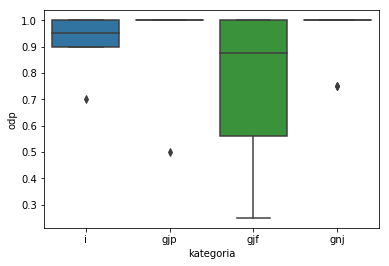

In [8]:
sns.boxplot(x=d.kategoria, y=d.odp)
plt.savefig('boxplot.png', dpi=150)

# Analiza wariancji (ANOVA)

Jednoczynnikowa analiza wariancji odpowiada nam na pytanie, czy istnieją istotne statystycznie różnice pomiędzy średnimi. W tym przypadku niestety, pomimo że średnie są różne od siebie, różnice te okazały się **nieistotne statystycznie**. P wyniosło 0,08 czyli jesteście na prawdę "na granicy" tej istotności (liczy się ją od 0,05), jednak te różnice są nieistotne.

Opisując wyniki należy po podaniu wartości śrendnich i odchyleń standardowych napisać coś takiego (oczywiście uzupełnijcie ZZ i ZN).

> Jednoczynnikowa analiza wariancji nie wykazała istotnego wpływu ZN na ZZ, F(3,36) = 2,375, p > 0,05.

In [9]:
mod = ols('odp ~ kategoria',
                data=d).fit()
                
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
kategoria,0.215188,3.0,2.375029,0.086218
Residual,1.087250,36.0,NaN,NaN
